In [103]:
import pandas as pd
import numpy as np
pd.set_option("display.max_columns", 500)
pd.set_option("display.width", 1000)
import matplotlib.pyplot as plt
import seaborn as sns

import warnings
warnings.filterwarnings("ignore")

In [104]:
df = pd.read_csv("../data/train.csv")

> ### ```Contents```

0. [Dataset Metadata](#ch0)
1. [Basic Checking](#ch1)
2. [Data Analysis](#ch2)
3. [Data type conversion](#ch3)

<a id = 'ch0'> </a>
### Metadata

1. **ID**: Represents a unique identification of an entry
2. **Customer_ID**: Represents a unique identification of a person
3. **Month**: Represents the month of the year
4. **Name**: Represents the name of a person
5. **Age**: Represents the age of the person
6. **SSN**: Represents the social security number of a person
7. **Occupation**: Represents the occupation of the person
8. **Annual_Income**: Represents the annual income of the person
9. **Monthly_Inhand_Salary**: Represents the monthly base salary of a person
10. **Num_Bank_Accounts**: Represents the number of bank accounts a person holds
11. **Num_Credit_Card**: Represents the number of other credit cards held by a person
12. **Interest_Rate**: Represents the interest rate on credit card
13. **Num_of_Loan**: Represents the number of loans taken from the bank
14. **Type_of_Loan**: Represents the types of loan taken by a person
15. **Delay_from_due_date**: Represents the average number of days delayed from the payment date
16. **Num_of_Delayed_Payment**: Represents the average number of payments delayed by a person
17. **Changed_Credit_Limit**: Represents the percentage change in credit card limit
18. **Num_Credit_Inquiries**: Represents the number of credit card inquiries
19. **Credit_Mix**: Represents the classification of the mix of creditS
20. **Outstanding_Debt**: Represents the remaining debt to be paid (in USD)
21. **Credit_Utilization_Ratio**: Represents the utilization ratio of credit card
22. **Credit_History_Age**: Represents the age of credit history of the person
23. **Payment_of_Min_Amount**: Represents whether only the minimum amount was paid by the person
24. **Total_EMI_per_month**: Represents the monthly EMI payments (in USD)
25. **Amount_invested_monthly**: Represents the monthly amount invested by the customer (in USD)
26. **Payment_Behaviour**: Represents the payment behavior of the customer (in USD)
27. **Monthly_Balance**: Represents the monthly balance amount of the customer (in USD)
28. **Credit_Score**: Represents the bracket of credit score (Poor, Standard, Good)

<a id = 'ch1'></a>

### Section 1 - Basic Checking (Rows & Column count, Columns type, Missing data, Duplicated data)

To get a better understanding of all the variables in the data. I will preview the data to gain the first sight. <br>
It's important for me to check the columns type so I can apply the appropriate feature engineering to the column. <br>
Last but not least, missing & duplicated data are important to check as well.

In [105]:
df.head(1)

,ID,Customer_ID,Month,Name,Age,SSN,Occupation,Annual_Income,Monthly_Inhand_Salary,Num_Bank_Accounts,Num_Credit_Card,Interest_Rate,Num_of_Loan,Type_of_Loan,Delay_from_due_date,Num_of_Delayed_Payment,Changed_Credit_Limit,Num_Credit_Inquiries,Credit_Mix,Outstanding_Debt,Credit_Utilization_Ratio,Credit_History_Age,Payment_of_Min_Amount,Total_EMI_per_month,Amount_invested_monthly,Payment_Behaviour,Monthly_Balance,Credit_Score
0,0x1602,CUS_0xd40,January,Aaron Maashoh,23,821-00-0265,Scientist,19114.12,1824.843333,3,4,3,4,"Auto Loan, Credit-Builder Loan, Personal Loan,...",3,7,11.27,4.0,_,809.98,26.82262,22 Years and 1 Months,No,49.574949,80.41529543900253,High_spent_Small_value_payments,312.49408867943663,Good


In [106]:
print(f"Rows: {df.shape[0]}, Columns: {df.shape[1]}")

Rows: 100000, Columns: 28


In [107]:
df.dtypes

ID                           object
Customer_ID                  object
Month                        object
Name                         object
Age                          object
SSN                          object
Occupation                   object
Annual_Income                object
Monthly_Inhand_Salary       float64
Num_Bank_Accounts             int64
Num_Credit_Card               int64
Interest_Rate                 int64
Num_of_Loan                  object
Type_of_Loan                 object
Delay_from_due_date           int64
Num_of_Delayed_Payment       object
Changed_Credit_Limit         object
Num_Credit_Inquiries        float64
Credit_Mix                   object
Outstanding_Debt             object
Credit_Utilization_Ratio    float64
Credit_History_Age           object
Payment_of_Min_Amount        object
Total_EMI_per_month         float64
Amount_invested_monthly      object
Payment_Behaviour            object
Monthly_Balance              object
Credit_Score                

In [108]:
object_list = []
float_list = []
int_list = []

for i in df.columns:
    if df[i].dtype == 'object':
        object_list.append(i)
    elif df[i].dtype == 'float64':
        float_list.append(i)
    elif df[i].dtype == 'int64':
        int_list.append(i)
        
print(f"Number of Columns (String): {len(object_list)}")
print(f"Number of Columns (Float): {len(float_list)}")
print(f"Number of Columns (Integer): {len(int_list)}")

Number of Columns (String): 20
Number of Columns (Float): 4
Number of Columns (Integer): 4


In [109]:
df.describe()

,Monthly_Inhand_Salary,Num_Bank_Accounts,Num_Credit_Card,Interest_Rate,Delay_from_due_date,Num_Credit_Inquiries,Credit_Utilization_Ratio,Total_EMI_per_month
count,84998.000000,100000.000000,100000.00000,100000.000000,100000.000000,98035.000000,100000.000000,100000.000000
mean,4194.170850,17.091280,22.47443,72.466040,21.068780,27.754251,32.285173,1403.118217
std,3183.686167,117.404834,129.05741,466.422621,14.860104,193.177339,5.116875,8306.041270
min,303.645417,-1.000000,0.00000,1.000000,-5.000000,0.000000,20.000000,0.000000
25%,1625.568229,3.000000,4.00000,8.000000,10.000000,3.000000,28.052567,30.306660
50%,3093.745000,6.000000,5.00000,13.000000,18.000000,6.000000,32.305784,69.249473
75%,5957.448333,7.000000,7.00000,20.000000,28.000000,9.000000,36.496663,161.224249
max,15204.633333,1798.000000,1499.00000,5797.000000,67.000000,2597.000000,50.000000,82331.000000


In [110]:
df.describe(include = 'O')

,ID,Customer_ID,Month,Name,Age,SSN,Occupation,Annual_Income,Num_of_Loan,Type_of_Loan,Num_of_Delayed_Payment,Changed_Credit_Limit,Credit_Mix,Outstanding_Debt,Credit_History_Age,Payment_of_Min_Amount,Amount_invested_monthly,Payment_Behaviour,Monthly_Balance,Credit_Score
count,100000,100000,100000,90015,100000,100000,100000,100000,100000,88592,92998,100000,100000,100000,90970,100000,95521,100000,98800,100000
unique,100000,12500,8,10139,1788,12501,16,18940,434,6260,749,4384,4,13178,404,3,91049,7,98792,3
top,0x1602,CUS_0xd40,January,Langep,38,#F%$D@*&8,_______,36585.12,3,Not Specified,19,_,Standard,1360.45,15 Years and 11 Months,Yes,__10000__,Low_spent_Small_value_payments,__-333333333333333333333333333__,Standard
freq,1,8,12500,44,2833,5572,7062,16,14386,1408,5327,2091,36479,24,446,52326,4305,25513,9,53174


In [111]:
df.isnull().sum()

ID                              0
Customer_ID                     0
Month                           0
Name                         9985
Age                             0
SSN                             0
Occupation                      0
Annual_Income                   0
Monthly_Inhand_Salary       15002
Num_Bank_Accounts               0
Num_Credit_Card                 0
Interest_Rate                   0
Num_of_Loan                     0
Type_of_Loan                11408
Delay_from_due_date             0
Num_of_Delayed_Payment       7002
Changed_Credit_Limit            0
Num_Credit_Inquiries         1965
Credit_Mix                      0
Outstanding_Debt                0
Credit_Utilization_Ratio        0
Credit_History_Age           9030
Payment_of_Min_Amount           0
Total_EMI_per_month             0
Amount_invested_monthly      4479
Payment_Behaviour               0
Monthly_Balance              1200
Credit_Score                    0
dtype: int64

In [112]:
df[df.duplicated()]

,ID,Customer_ID,Month,Name,Age,SSN,Occupation,Annual_Income,Monthly_Inhand_Salary,Num_Bank_Accounts,Num_Credit_Card,Interest_Rate,Num_of_Loan,Type_of_Loan,Delay_from_due_date,Num_of_Delayed_Payment,Changed_Credit_Limit,Num_Credit_Inquiries,Credit_Mix,Outstanding_Debt,Credit_Utilization_Ratio,Credit_History_Age,Payment_of_Min_Amount,Total_EMI_per_month,Amount_invested_monthly,Payment_Behaviour,Monthly_Balance,Credit_Score


### Observation:

1. There's no duplicated rows data inside the dataset.<br>
2. There are 8 columns have the null data. Which are **Name, Monthly_Inhand_Salary, Type_of_Loan, Num_of_Delayed_Payment, Num_Credit_Inquiries, Credit_History_AGE, Amount_invested_monthly, Monthly_Balance**. But we will analyse how missing value impact the dataset.
3. There are many *numeric* (float/int) columns are **object** types column in the dataset. It's necessary to convert the data type in next section.
4. **Occupation** shows that 7062 records are dont show their occupation in the dataset.
5. **Type of Loan** have nearly 6k different types of loan.
6. There are 8 columns contain the missing value, we will handle the missing value in feature engineering.
7. 

<a id = 'ch2'></a>

### Section 2 - Data Analysis

In this section, we will analyse the dataset to gain the insight.

In [113]:
for i in range(0,3):
    index = df['Credit_Score'].value_counts().index[i]
    value_count = df['Credit_Score'].value_counts()[i]
    target_proportion = (value_count / 100000) * 100
    print(f"Value: {index}, Count: {value_count}, Percentage(%): {np.round(target_proportion,2)}%")

Value: Standard, Count: 53174, Percentage(%): 53.17%
Value: Poor, Count: 28998, Percentage(%): 29.0%
Value: Good, Count: 17828, Percentage(%): 17.83%


1. There are more than half clients have the standard category in credit score.
2. Only 17.83% clients gets the good category among all the clients.
3.  1/3 clients have the poor category
4. This is the multiclass classification task.

In [114]:
df.head(2)

,ID,Customer_ID,Month,Name,Age,SSN,Occupation,Annual_Income,Monthly_Inhand_Salary,Num_Bank_Accounts,Num_Credit_Card,Interest_Rate,Num_of_Loan,Type_of_Loan,Delay_from_due_date,Num_of_Delayed_Payment,Changed_Credit_Limit,Num_Credit_Inquiries,Credit_Mix,Outstanding_Debt,Credit_Utilization_Ratio,Credit_History_Age,Payment_of_Min_Amount,Total_EMI_per_month,Amount_invested_monthly,Payment_Behaviour,Monthly_Balance,Credit_Score
0,0x1602,CUS_0xd40,January,Aaron Maashoh,23,821-00-0265,Scientist,19114.12,1824.843333,3,4,3,4,"Auto Loan, Credit-Builder Loan, Personal Loan,...",3,7,11.27,4.0,_,809.98,26.82262,22 Years and 1 Months,No,49.574949,80.41529543900253,High_spent_Small_value_payments,312.49408867943663,Good
1,0x1603,CUS_0xd40,February,Aaron Maashoh,23,821-00-0265,Scientist,19114.12,NaN,3,4,3,4,"Auto Loan, Credit-Builder Loan, Personal Loan,...",-1,NaN,11.27,4.0,Good,809.98,31.94496,NaN,No,49.574949,118.28022162236736,Low_spent_Large_value_payments,284.62916249607184,Good


I observed that this is the dataset about the credited-related info related to the clients in the bank. <br>
There are 2 perspective can observed, income wise & financial product (credit card, loan) wise. <br>
1. Salary: represented how many income amount are credited into the bank. And the number of bank accounts the client have.
2. Financial product: It shows that how many financial products (credit card, loan) the clients have in the bank. And it shows the details about the credit history. Such as the number of delayed payment and outstanding debt.

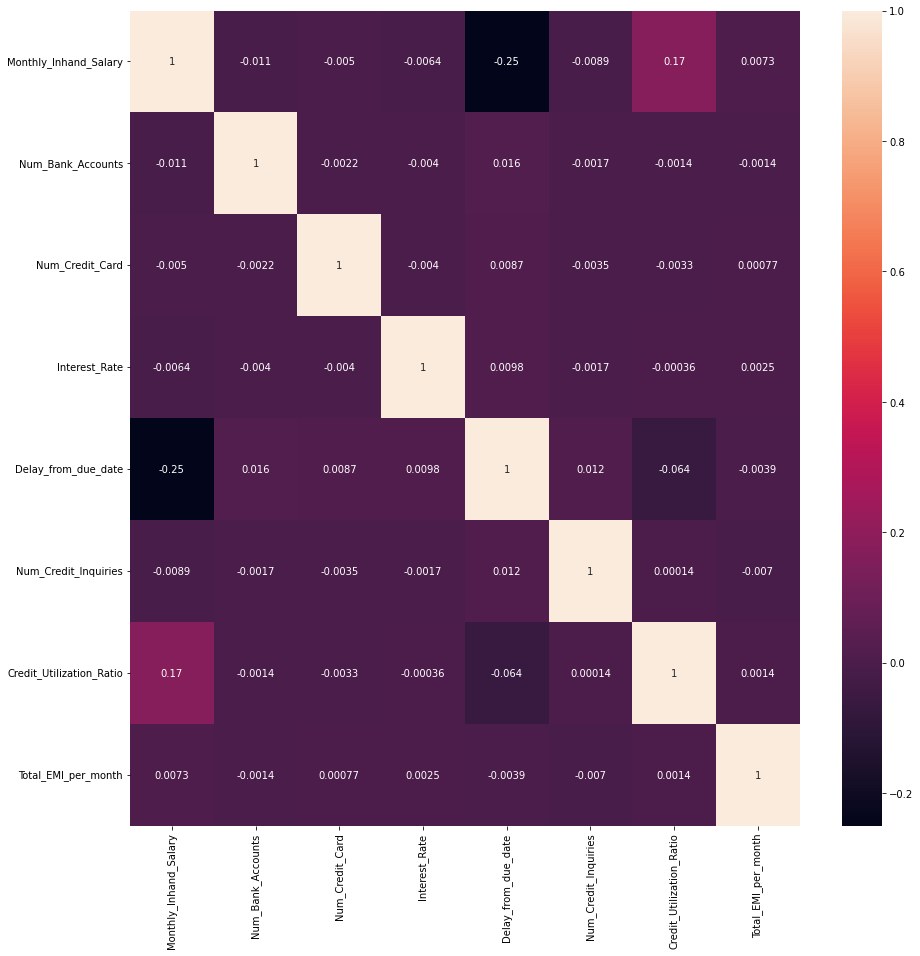

In [115]:
plt.figure(figsize = (15,15))
sns.heatmap(df.corr(), annot = True)
plt.show()

I am using the heatmap graph to check the correlation between the numerical columns. <br>
Please take note that this is not the complete heatmap result, some columns are string type but with numerical values. <br>
I will check again the correlation after convert the columns into correct data type. <br><br>

1. Monthly_Inhand_Salary column has the positive correlation with Monthly Balance column. Because monthly balance is reflected by the salary credited into account.
2. Delay_from_due_date column has the negative correlation with Monthly Balance column. The more delay days from due date The lesser monthly balance.
3. Delay_from_due_date column has 57% correlation rate with Outstanding Debt column. There are some relationship between these 2 columns.
4. 

##### 1. How does the data looks like for credit score == Good?

In [116]:
df[df['Credit_Score'] == 'Good'].head(1)

,ID,Customer_ID,Month,Name,Age,SSN,Occupation,Annual_Income,Monthly_Inhand_Salary,Num_Bank_Accounts,Num_Credit_Card,Interest_Rate,Num_of_Loan,Type_of_Loan,Delay_from_due_date,Num_of_Delayed_Payment,Changed_Credit_Limit,Num_Credit_Inquiries,Credit_Mix,Outstanding_Debt,Credit_Utilization_Ratio,Credit_History_Age,Payment_of_Min_Amount,Total_EMI_per_month,Amount_invested_monthly,Payment_Behaviour,Monthly_Balance,Credit_Score
0,0x1602,CUS_0xd40,January,Aaron Maashoh,23,821-00-0265,Scientist,19114.12,1824.843333,3,4,3,4,"Auto Loan, Credit-Builder Loan, Personal Loan,...",3,7,11.27,4.0,_,809.98,26.82262,22 Years and 1 Months,No,49.574949,80.41529543900253,High_spent_Small_value_payments,312.49408867943663,Good


(array([10679.,  6189.,   561.,   126.,    50.,    46.,    45.,    44.,
           43.,    45.]),
 array([  0. ,  43.4,  86.8, 130.2, 173.6, 217. , 260.4, 303.8, 347.2,
        390.6, 434. ]),
 <BarContainer object of 10 artists>)

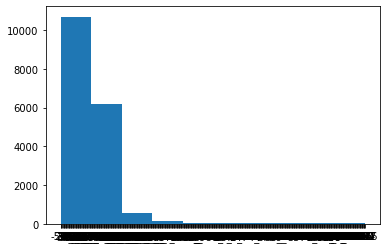

In [117]:
plt.hist(df[df['Credit_Score'] == 'Good']['Age'])

<AxesSubplot:xlabel='Month', ylabel='Monthly_Inhand_Salary'>

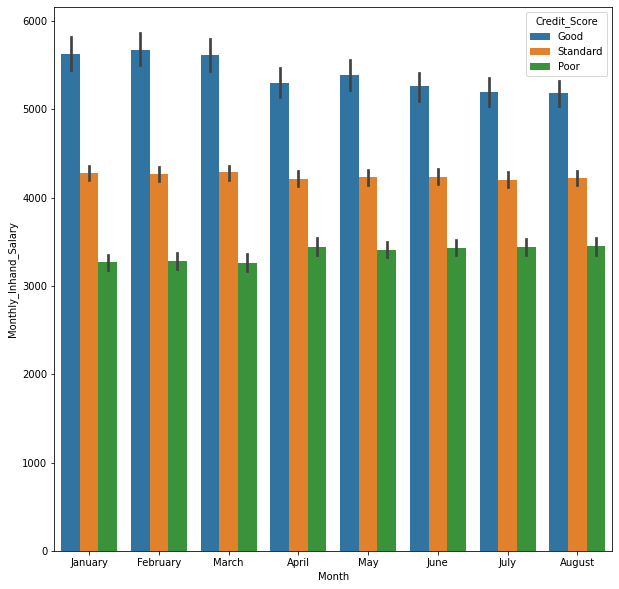

In [118]:
plt.figure(figsize = (10,10))
sns.barplot(data = df, x = "Month", y = "Monthly_Inhand_Salary", hue = "Credit_Score")

<a id = 'ch3'></a>

### Section 3 - Data type conversion

In this section, I will convert below columns from object type to integer type. <br>
**Age, Annual_Income, Num_of_Loan, Num_of_Delayed_Payment, Changed_Credit_Limit, Credit_Mix, Outstanding_Debt, Payment_of_Min_Amount, Amount_invested_monthly, Monthly_Balance**<br>
It's due to those columns have numeric values but in object type.


In [119]:
Column_Int_list = ['Age', 'Num_of_Loan', 'Num_of_Delayed_Payment']
#Column_Float_list = ['Annual_Income', 'Outstanding_Debt', 'Payment_of_Min_Amount', 'Amount_invested_monthly', 'Monthly_Balance']
Column_Float_list = ['Annual_Income', 'Changed_Credit_Limit', 'Outstanding_Debt', 'Amount_invested_monthly']

In [120]:
#df[df['Age'].str.endswith('_')]['Age']
#df.iloc[0,:]['Age'][:-1]

In [121]:
def check_front_back_underscore(col: str):
    filtered_df = df[df[col].notnull()]
    ends_count = filtered_df[filtered_df[col].str.endswith('_')].shape[0]
    starts_count = filtered_df[filtered_df[col].str.startswith('_')].shape[0]
    both_count = filtered_df[filtered_df[col].str.endswith('_') & filtered_df[col].str.startswith('_')].shape[0]
    print(f"Column: {col}, ends_row_count: {ends_count}, starts_row_count: {starts_count}, starts_end_row_count: {both_count}")

In [122]:
for i in Column_Int_list:
    check_front_back_underscore(i)

Column: Age, ends_row_count: 4939, starts_row_count: 0, starts_end_row_count: 0
Column: Num_of_Loan, ends_row_count: 4785, starts_row_count: 0, starts_end_row_count: 0
Column: Num_of_Delayed_Payment, ends_row_count: 2744, starts_row_count: 0, starts_end_row_count: 0


In [123]:
for i in Column_Float_list:
    check_front_back_underscore(i)

Column: Annual_Income, ends_row_count: 6980, starts_row_count: 0, starts_end_row_count: 0
Column: Changed_Credit_Limit, ends_row_count: 2091, starts_row_count: 2091, starts_end_row_count: 2091
Column: Outstanding_Debt, ends_row_count: 1009, starts_row_count: 0, starts_end_row_count: 0
Column: Amount_invested_monthly, ends_row_count: 4305, starts_row_count: 4305, starts_end_row_count: 4305


### Notes:

I found that I cant conver the column from object type into integer/float type. <br>
It's due to column value consists of string. Hence, I write the function *check_front_back_underscore* to check the string. <br>
1. Columns, **Age**, **Num_of_Loan**, **Num_of_Delayed_Payment**, **Annual_Income** & **Outstanding_Debt** have the postfix.
2. Columns, **Changed_Credit_Limit**, **Credit_Mix** & **Amount_invested_monthly** consists of "-" to represent the null value.

### Notes 2:

I found that some columns consists of null values. This is the blocker for me to convert the data type. <br>
Hence, I decided to process the null values first before convert the data type.
1. Num_of_Delayed_Payment
2. Payment_of_Min_Amount
3. Amount_invested_monthly

#### Integer Columns:

###### 1. Age (convert into int type -> filter out x < 0 & x > 100 values)

In [124]:
#df['Start'] = df['Start'].apply(lambda x:x.rstrip('A'))
df['Age'] = df['Age'].apply(lambda x:x.rstrip('_'))
df[df['Age'].str.endswith('_')]

,ID,Customer_ID,Month,Name,Age,SSN,Occupation,Annual_Income,Monthly_Inhand_Salary,Num_Bank_Accounts,Num_Credit_Card,Interest_Rate,Num_of_Loan,Type_of_Loan,Delay_from_due_date,Num_of_Delayed_Payment,Changed_Credit_Limit,Num_Credit_Inquiries,Credit_Mix,Outstanding_Debt,Credit_Utilization_Ratio,Credit_History_Age,Payment_of_Min_Amount,Total_EMI_per_month,Amount_invested_monthly,Payment_Behaviour,Monthly_Balance,Credit_Score


In [125]:
df['Age'] = df['Age'].astype('int')

In [126]:
df = df[(df['Age'] > 0) & (df['Age'] < 100)]

In [127]:
from sklearn.preprocessing import StandardScaler

std_scaler = StandardScaler()
df['Age'] = std_scaler.fit_transform(df[['Age']]).flatten() #normalize the age column value from -1 to 1

In [128]:
df['Age'].describe()

count    9.722300e+04
mean    -1.660464e-16
std      1.000005e+00
min     -1.792982e+00
25%     -8.650619e-01
50%     -2.993362e-02
75%      8.051946e-01
max      6.094340e+00
Name: Age, dtype: float64

In [129]:
df['Age'].describe()

count    9.722300e+04
mean    -1.660464e-16
std      1.000005e+00
min     -1.792982e+00
25%     -8.650619e-01
50%     -2.993362e-02
75%      8.051946e-01
max      6.094340e+00
Name: Age, dtype: float64

###### 2. Num_of_Loan (remove the postfix -> convert into int type -> filter the value less than 10)

In [130]:
df['Num_of_Loan'] = df['Num_of_Loan'].apply(lambda x:x.rstrip('_'))
df[df['Num_of_Loan'].str.endswith('_')]

,ID,Customer_ID,Month,Name,Age,SSN,Occupation,Annual_Income,Monthly_Inhand_Salary,Num_Bank_Accounts,Num_Credit_Card,Interest_Rate,Num_of_Loan,Type_of_Loan,Delay_from_due_date,Num_of_Delayed_Payment,Changed_Credit_Limit,Num_Credit_Inquiries,Credit_Mix,Outstanding_Debt,Credit_Utilization_Ratio,Credit_History_Age,Payment_of_Min_Amount,Total_EMI_per_month,Amount_invested_monthly,Payment_Behaviour,Monthly_Balance,Credit_Score


In [131]:
df['Num_of_Loan'] = df['Num_of_Loan'].astype('int')
df['Num_of_Loan'].describe()

count    97223.000000
mean         2.956152
std         62.233850
min       -100.000000
25%          1.000000
50%          3.000000
75%          5.000000
max       1496.000000
Name: Num_of_Loan, dtype: float64

In [132]:
df[df['Num_of_Loan'] > 5]['Num_of_Loan'].value_counts()

6       7585
7       7130
9       3602
8       3105
1150       4
        ... 
630        1
252        1
745        1
103        1
966        1
Name: Num_of_Loan, Length: 392, dtype: int64

In [133]:
df = df[(df['Num_of_Loan'] < 10)]

In [134]:
df['Num_of_Loan'].describe()

count    96770.000000
mean        -0.500599
std         20.179147
min       -100.000000
25%          1.000000
50%          3.000000
75%          5.000000
max          9.000000
Name: Num_of_Loan, dtype: float64

###### 3. Num_of_Delayed_Payment (impute Missing Value with mode value -> remove postfix -> convert into float type)

In [135]:
df['Num_of_Delayed_Payment'].isnull().sum()

6796

In [136]:
df['Num_of_Delayed_Payment'].mode()

0    19
dtype: object

In [137]:
df[df['Num_of_Delayed_Payment'].isnull()]['Credit_Score'].value_counts()

Standard    3636
Poor        1952
Good        1208
Name: Credit_Score, dtype: int64

In [138]:
df[df['Credit_Score'] == 'Standard'].groupby('Credit_Score')['Num_of_Delayed_Payment'].value_counts()

Credit_Score  Num_of_Delayed_Payment
Standard      17                        3028
              16                        2962
              19                        2945
              15                        2941
              12                        2866
                                        ... 
              94                           1
              960                          1
              972                          1
              98                           1
              996                          1
Name: Num_of_Delayed_Payment, Length: 437, dtype: int64

In [139]:
impute_value_Num_of_Delayed_Payment = df['Num_of_Delayed_Payment'].mode()[0]

df['Num_of_Delayed_Payment'] = df['Num_of_Delayed_Payment'].fillna('19')

In [140]:
df['Num_of_Delayed_Payment'] = df['Num_of_Delayed_Payment'].apply(lambda x:x.rstrip('_'))
df['Num_of_Delayed_Payment'] = df['Num_of_Delayed_Payment'].astype('int')

#### 2. Float Columns

##### 1. Annual_Income (remove the postfix -> convert into float type)

In [141]:
df['Annual_Income'] = df['Annual_Income'].apply(lambda x:x.rstrip('_'))

In [142]:
df[df['Annual_Income'].str.endswith("_")]

,ID,Customer_ID,Month,Name,Age,SSN,Occupation,Annual_Income,Monthly_Inhand_Salary,Num_Bank_Accounts,Num_Credit_Card,Interest_Rate,Num_of_Loan,Type_of_Loan,Delay_from_due_date,Num_of_Delayed_Payment,Changed_Credit_Limit,Num_Credit_Inquiries,Credit_Mix,Outstanding_Debt,Credit_Utilization_Ratio,Credit_History_Age,Payment_of_Min_Amount,Total_EMI_per_month,Amount_invested_monthly,Payment_Behaviour,Monthly_Balance,Credit_Score


In [143]:
df['Annual_Income'] = df['Annual_Income'].astype("float")

##### 2. Changed_Credit_Limit (replace _ to 0 -> convert to float)

In [144]:
df[df['Changed_Credit_Limit'].str.endswith('_')]['Changed_Credit_Limit'].value_counts()

_    2023
Name: Changed_Credit_Limit, dtype: int64

In [145]:
df['Changed_Credit_Limit'] = df['Changed_Credit_Limit'].replace('_', 0)

In [146]:
df['Changed_Credit_Limit'].value_counts()

0                     2023
8.22                   133
11.5                   125
11.32                  121
10.06                  119
                      ... 
0.8899999999999999       1
30.48                    1
27.28                    1
1.4800000000000004       1
21.17                    1
Name: Changed_Credit_Limit, Length: 4371, dtype: int64

In [147]:
df['Changed_Credit_Limit'] = df['Changed_Credit_Limit'].astype('float')

##### 3. Outstanding_Debt (remove the postfix -> convert into float type)

In [148]:
df['Outstanding_Debt'].value_counts()

1151.7      23
1360.45     22
1109.03     21
460.46      20
1123.0      16
            ..
3523.03_     1
1073.76_     1
465.88_      1
4381.33_     1
754.8_       1
Name: Outstanding_Debt, Length: 13144, dtype: int64

In [149]:
df['Outstanding_Debt'] = df['Outstanding_Debt'].apply(lambda x:x.rstrip('_'))

In [150]:
df[df['Outstanding_Debt'].str.endswith("_")]

,ID,Customer_ID,Month,Name,Age,SSN,Occupation,Annual_Income,Monthly_Inhand_Salary,Num_Bank_Accounts,Num_Credit_Card,Interest_Rate,Num_of_Loan,Type_of_Loan,Delay_from_due_date,Num_of_Delayed_Payment,Changed_Credit_Limit,Num_Credit_Inquiries,Credit_Mix,Outstanding_Debt,Credit_Utilization_Ratio,Credit_History_Age,Payment_of_Min_Amount,Total_EMI_per_month,Amount_invested_monthly,Payment_Behaviour,Monthly_Balance,Credit_Score


In [151]:
df['Outstanding_Debt'] = df['Outstanding_Debt'].astype("float")

##### 4. Amount_invested_monthly

In [152]:
df[df["Amount_invested_monthly"].isnull()].shape

(4317, 28)

In [153]:
df["Amount_invested_monthly"] = df["Amount_invested_monthly"].fillna(0)

In [154]:
df[(df["Amount_invested_monthly"].str.endswith("_")) & (df["Amount_invested_monthly"].str.startswith("_"))]["Amount_invested_monthly"].value_counts()

__10000__    4157
Name: Amount_invested_monthly, dtype: int64

In [155]:
df["Amount_invested_monthly"] = df["Amount_invested_monthly"].replace("__10000__", "10000")

In [156]:
df["Amount_invested_monthly"].value_counts()

0                     4317
10000                 4157
0.0                    162
81.77340833765794        1
195.5938316873959        1
                      ... 
908.6319908830916        1
230.18636879976884       1
132.4517797000913        1
244.49349341323514       1
167.1638651610451        1
Name: Amount_invested_monthly, Length: 88137, dtype: int64

In [157]:
df["Amount_invested_monthly"] = df["Amount_invested_monthly"].astype("float")

##### 5. Monthly_Balance

In [158]:
df = df[df['Monthly_Balance'] != '__-333333333333333333333333333__']

In [159]:
df['Monthly_Balance'] = df['Monthly_Balance'].astype("float")

##### Conclusion

In [160]:
[feature for feature in df.columns if (df[feature].dtypes == 'int64') or (df[feature].dtypes == 'int32') or (df[feature].dtypes == 'float64')]

['Age',
 'Annual_Income',
 'Monthly_Inhand_Salary',
 'Num_Bank_Accounts',
 'Num_Credit_Card',
 'Interest_Rate',
 'Num_of_Loan',
 'Delay_from_due_date',
 'Num_of_Delayed_Payment',
 'Changed_Credit_Limit',
 'Num_Credit_Inquiries',
 'Outstanding_Debt',
 'Credit_Utilization_Ratio',
 'Total_EMI_per_month',
 'Amount_invested_monthly',
 'Monthly_Balance']

In [161]:
[feature for feature in df.columns if (df[feature].dtypes == 'object')]

['ID',
 'Customer_ID',
 'Month',
 'Name',
 'SSN',
 'Occupation',
 'Type_of_Loan',
 'Credit_Mix',
 'Credit_History_Age',
 'Payment_of_Min_Amount',
 'Payment_Behaviour',
 'Credit_Score']

In [172]:
test = df.copy()
len(test['Credit_Mix'].value_counts())

4

In [162]:
df.describe(include = 'O')

,ID,Customer_ID,Month,Name,SSN,Occupation,Type_of_Loan,Credit_Mix,Credit_History_Age,Payment_of_Min_Amount,Payment_Behaviour,Credit_Score
count,96761,96761,96761,87094,96761,96761,85744,96761,88014,96761,96761,96761
unique,96761,12500,8,10139,12501,16,6260,4,404,3,7,3
top,0x1602,CUS_0x2646,August,Langep,#F%$D@*&8,_______,Not Specified,Standard,15 Years and 11 Months,Yes,Low_spent_Small_value_payments,Standard
freq,1,8,12115,42,5388,6837,1372,35340,431,50680,24730,51469


In [163]:
df.describe()

,Age,Annual_Income,Monthly_Inhand_Salary,Num_Bank_Accounts,Num_Credit_Card,Interest_Rate,Num_of_Loan,Delay_from_due_date,Num_of_Delayed_Payment,Changed_Credit_Limit,Num_Credit_Inquiries,Outstanding_Debt,Credit_Utilization_Ratio,Total_EMI_per_month,Amount_invested_monthly,Monthly_Balance
count,96761.000000,9.676100e+04,82208.000000,96761.000000,96761.000000,96761.000000,96761.000000,96761.000000,96761.000000,96761.000000,94865.000000,96761.000000,96761.000000,96761.000000,96761.000000,95587.000000
mean,-0.000078,1.769172e+05,4194.905404,17.142175,22.432550,72.631804,-0.500946,21.086233,29.924815,10.172644,27.895072,1426.666187,32.284805,1395.907438,608.250532,402.435801
std,0.999989,1.433619e+06,3182.626075,117.813388,128.760896,467.303318,20.180038,14.864042,216.841244,6.881360,193.814303,1155.483606,5.118074,8277.814085,1999.411520,213.889580
min,-1.792982,7.005930e+03,303.645417,-1.000000,0.000000,1.000000,-100.000000,-5.000000,-3.000000,-6.480000,0.000000,0.230000,20.000000,0.000000,0.000000,0.007760
25%,-0.865062,1.946292e+04,1626.525000,3.000000,4.000000,8.000000,1.000000,10.000000,9.000000,4.970000,3.000000,566.080000,28.053579,30.356067,67.452507,270.083355
50%,-0.029934,3.758034e+04,3096.378333,6.000000,5.000000,13.000000,3.000000,18.000000,15.000000,9.250000,6.000000,1166.230000,32.305298,69.272824,128.772885,336.683990
75%,0.805195,7.281702e+04,5961.637500,7.000000,7.000000,20.000000,5.000000,28.000000,19.000000,14.650000,9.000000,1948.880000,36.498978,161.340704,255.504926,469.941466
max,6.094340,2.419806e+07,15204.633333,1798.000000,1499.000000,5797.000000,9.000000,67.000000,4397.000000,36.970000,2597.000000,4998.070000,50.000000,82331.000000,10000.000000,1602.040519


In [173]:
df.isnull().sum()

ID                              0
Customer_ID                     0
Month                           0
Name                         9667
Age                             0
SSN                             0
Occupation                      0
Annual_Income                   0
Monthly_Inhand_Salary       14553
Num_Bank_Accounts               0
Num_Credit_Card                 0
Interest_Rate                   0
Num_of_Loan                     0
Type_of_Loan                11017
Delay_from_due_date             0
Num_of_Delayed_Payment          0
Changed_Credit_Limit            0
Num_Credit_Inquiries         1896
Credit_Mix                      0
Outstanding_Debt                0
Credit_Utilization_Ratio        0
Credit_History_Age           8747
Payment_of_Min_Amount           0
Total_EMI_per_month             0
Amount_invested_monthly         0
Payment_Behaviour               0
Monthly_Balance              1174
Credit_Score                    0
dtype: int64

In [174]:
test = pd.read_csv("../data/train_processed.csv")
test.isnull().sum()

ID                              0
Customer_ID                     0
Month                           0
Name                         9717
Age                             0
SSN                             0
Occupation                      0
Annual_Income                   0
Monthly_Inhand_Salary           0
Num_Bank_Accounts               0
Num_Credit_Card                 0
Interest_Rate                   0
Num_of_Loan                     0
Type_of_Loan                11076
Delay_from_due_date             0
Num_of_Delayed_Payment          0
Changed_Credit_Limit            0
Num_Credit_Inquiries            0
Credit_Mix                      0
Outstanding_Debt                0
Credit_Utilization_Ratio        0
Credit_History_Age           8791
Payment_of_Min_Amount           0
Total_EMI_per_month             0
Amount_invested_monthly      4343
Payment_Behaviour               0
Monthly_Balance                 0
Credit_Score                    0
Month_num                       0
dtype: int64

##### 5. Others

In [165]:
df[df['Credit_Mix'].str.endswith('_')]['Credit_Mix'].value_counts()

_    19537
Name: Credit_Mix, dtype: int64

In [166]:
df['Credit_Mix'].value_counts()

Standard    35340
Good        23502
_           19537
Bad         18382
Name: Credit_Mix, dtype: int64

In [167]:
test = df[df['Monthly_Balance'].notnull()]
test = test[test['Monthly_Balance'] != '__-333333333333333333333333333__']
test['Monthly_Balance'].value_counts()

312.494089    1
384.251040    1
319.975658    1
342.894838    1
335.568659    1
             ..
445.164732    1
417.742261    1
440.568856    1
340.521285    1
393.673696    1
Name: Monthly_Balance, Length: 95587, dtype: int64